# Enviramental Setup

In [85]:
!pip install librosa numpy pandas scikit-learn matplotlib
!pip install tensorflow keras
!pip install pydub ffmpeg
import requests
import os
import time
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 27.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 29.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 28.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.9 MB/s eta 0:00:00


# Data Collection

In [305]:
import os
import time
import requests
from tqdm import tqdm  # Import tqdm for progress bars

# List of bird species to download
# 麻雀, 烏鴉, 海鷗, 綠頭鴨
bird_species = [
    "Passer montanus", "Corvus macrorhynchos", "Larus canus",
    "Anas platyrhynchos"
]

# Number of recordings to download per bird
max_recordings = 300

# Create data directory
os.makedirs("data", exist_ok=True)

# Download recordings
for bird in bird_species:
    print(f"\n🔹 Downloading recordings for: {bird}...")

    save_dir = os.path.join("data", bird.replace(" ", "_"))  # Save directory
    os.makedirs(save_dir, exist_ok=True)
    url = f"https://xeno-canto.org/api/2/recordings?query={bird}"

    # Get recordings from API
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        recordings = response.json().get("recordings", [])[:max_recordings]
    except Exception as e:
        print(f"❌ Failed to fetch recordings for {bird}: {e}")
        continue  # Skip this bird if API fails

    # Progress bar to track number of files downloaded
    with tqdm(total=len(recordings), desc=f"📥 Downloading {bird}", unit="file", leave=True) as pbar:
        for rec in recordings:
            file_url = rec.get("file")
            if not file_url:
                pbar.update(1)
                continue

            file_path = os.path.join(save_dir, f"{rec['id']}.mp3")
            
            try:
                # Download file without inner progress bar
                response = requests.get(file_url)
                response.raise_for_status()
                
                with open(file_path, "wb") as f:
                    f.write(response.content)  # Directly write the full file

            except Exception as e:
                print(f"❌ Failed to download {file_path}: {e}")
            
            pbar.update(1)  # Update the progress bar after each file
            # time.sleep(1)  # Avoid overloading the server


🔹 Downloading recordings for: Passer montanus...


📥 Downloading Passer montanus:   1%|         | 3/300 [00:14<20:20,  4.11s/file]

❌ Failed to download data/Passer_montanus/964945.mp3: 404 Client Error: Not Found for url: https://xeno-canto.org/964945/download


📥 Downloading Passer montanus: 100%|███████| 300/300 [15:51<00:00,  3.17s/file]



🔹 Downloading recordings for: Corvus macrorhynchos...


📥 Downloading Corvus macrorhynchos: 100%|██| 300/300 [14:25<00:00,  2.88s/file]



🔹 Downloading recordings for: Larus canus...


📥 Downloading Larus canus: 100%|███████████| 300/300 [14:35<00:00,  2.92s/file]



🔹 Downloading recordings for: Anas platyrhynchos...


📥 Downloading Anas platyrhynchos: 100%|████| 300/300 [14:19<00:00,  2.86s/file]


# Realization Dataset

In [ ]:
import os
from pydub import AudioSegment

# Function to convert MP3 to WAV and trim to max 10 seconds
def convert_mp3_to_wav(mp3_path, wav_path, max_duration=10):
    try:
        # Load the MP3 file
        audio = AudioSegment.from_file(mp3_path, format="mp3")

        # Trim to max_duration seconds
        max_duration_ms = max_duration * 1000  # Convert to milliseconds
        if len(audio) > max_duration_ms:
            audio = audio[:max_duration_ms]  # Trim if longer than 10s

        # Export as WAV
        audio.export(wav_path, format="wav")
        
        # Remove the original MP3 file after successful conversion
        # os.remove(mp3_path)
        print(f"Converted and trimmed: {mp3_path} -> {wav_path} (Max {max_duration}s)")

    except Exception as e:
        print(f"❌ Failed to convert {mp3_path}: {e}")

# Set dataset path
DATASET_PATH = "data/"  # Change this to your actual dataset directory

# Loop through all bird species folders and convert MP3 files to WAV
for bird_species in os.listdir(DATASET_PATH):
    species_folder = os.path.join(DATASET_PATH, bird_species)
    if os.path.isdir(species_folder):  # Ensure it's a folder
        for file in os.listdir(species_folder):
            if file.endswith(".mp3"):  # Only convert MP3 files
                file_path = os.path.join(species_folder, file)
                wav_path = file_path.replace(".mp3", ".wav")  # Save as WAV
                convert_mp3_to_wav(file_path, wav_path)

Converted and trimmed: data/Anas_platyrhynchos/297303.mp3 -> data/Anas_platyrhynchos/297303.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/598280.mp3 -> data/Anas_platyrhynchos/598280.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/72753.mp3 -> data/Anas_platyrhynchos/72753.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/394597.mp3 -> data/Anas_platyrhynchos/394597.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/495820.mp3 -> data/Anas_platyrhynchos/495820.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/932958.mp3 -> data/Anas_platyrhynchos/932958.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/280938.mp3 -> data/Anas_platyrhynchos/280938.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/357091.mp3 -> data/Anas_platyrhynchos/357091.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/495835.mp3 -> data/Anas_platyrhynchos/495835.wav (Max 10s)
Converted and trimmed: data/Anas_platyrhynchos/3

# Feature Extraction and Data Preprocessing

In [41]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Define function to extract MFCC features from an audio file
def extract_mfcc(file_path, max_pad_len=50, max_duration=20):
    try:
        # Load audio
        audio, sample_rate = librosa.load(file_path, sr=22050, duration=max_duration)
        print(f"Loaded {file_path} - Sample Rate: {sample_rate}, Length: {len(audio)}")

        # Extract MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        pad_width = max_pad_len - mfcc.shape[1]
        if pad_width > 0:
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]

        return mfcc.flatten()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Set dataset path
DATASET_PATH = "data/"  # Folder containing subfolders for each bird species

# Prepare dataset
features = []
labels = []

# Loop through all bird species folders
for bird_species in os.listdir(DATASET_PATH):
    species_folder = os.path.join(DATASET_PATH, bird_species)
    if os.path.isdir(species_folder):  # Ensure it's a folder
        for file in os.listdir(species_folder):
            if file.endswith(".wav"):
                file_path = os.path.join(species_folder, file)
                mfcc_features = extract_mfcc(file_path)
                if mfcc_features is not None:
                    features.append(mfcc_features)
                    labels.append(bird_species)  # Bird species name as label

# Convert to DataFrame
df = pd.DataFrame(features)
df["label"] = labels

# Save dataset
df.to_csv("bird_mfcc_dataset.csv", index=False)
print("Dataset saved as bird_mfcc_dataset.csv")

# # Load dataset
# df = pd.read_csv("bird_mfcc_dataset.csv")

# df = df[df["10"] != 0]

# # Encode labels
# X = df.drop(columns=["label"]).values
# # y = LabelEncoder().fit_transform(df["label"])
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(df["label"])  # Fit label encoder

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Loaded data/Anas_platyrhynchos/433108.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/434854.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/127375.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/600591.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/698290.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/56301.wav - Sample Rate: 22050, Length: 104832
Loaded data/Anas_platyrhynchos/541824.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/62258.wav - Sample Rate: 22050, Length: 76401
Loaded data/Anas_platyrhynchos/933184.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/955771.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/436930.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/975927.wav - Sample Rate: 22050, Length: 1336
Loaded data/Anas_platyrhynchos/25717.wav - Sample Rate: 2

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1336
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(


Loaded data/Anas_platyrhynchos/123501.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/962451.wav - Sample Rate: 22050, Length: 882
Loaded data/Anas_platyrhynchos/363604.wav - Sample Rate: 22050, Length: 170496
Loaded data/Anas_platyrhynchos/519495.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/963571.wav - Sample Rate: 22050, Length: 960
Loaded data/Anas_platyrhynchos/732333.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/392206.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/196999.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/976961.wav - Sample Rate: 22050, Length: 960
Loaded data/Anas_platyrhynchos/396538.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/285222.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/112680.wav - Sample Rate: 22050, Length: 220500


/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=960
  warnings.warn(


Loaded data/Anas_platyrhynchos/718647.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/573927.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/246537.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/26970.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/568122.wav - Sample Rate: 22050, Length: 108032
Loaded data/Anas_platyrhynchos/113968.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/208506.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/541822.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/950395.wav - Sample Rate: 22050, Length: 76641
Loaded data/Anas_platyrhynchos/596809.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/541823.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/237697.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/692779.wav - Sample Rat

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=618
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=983
  warnings.warn(


Loaded data/Anas_platyrhynchos/26966.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/933778.wav - Sample Rate: 22050, Length: 25052
Loaded data/Anas_platyrhynchos/550124.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/573759.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/598061.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/718815.wav - Sample Rate: 22050, Length: 92120
Loaded data/Anas_platyrhynchos/905291.wav - Sample Rate: 22050, Length: 983
Loaded data/Anas_platyrhynchos/473567.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/926689.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/717918.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/466181.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/298825.wav - Sample Rate: 22050, Length: 87889
Loaded data/Anas_platyrhynchos/941766.wav - Sample Rate: 22

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=265
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=384
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=177
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=706
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1059
  warnings.warn(


Loaded data/Anas_platyrhynchos/710910.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/946815.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/496515.wav - Sample Rate: 22050, Length: 131840
Loaded data/Anas_platyrhynchos/717931.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/304006.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/884217.wav - Sample Rate: 22050, Length: 177
Loaded data/Anas_platyrhynchos/553878.wav - Sample Rate: 22050, Length: 162654
Loaded data/Anas_platyrhynchos/98746.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/483898.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/298826.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/46614.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/280933.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/906162.wav - Sample Rate: 

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1067
  warnings.warn(


Loaded data/Anas_platyrhynchos/964309.wav - Sample Rate: 22050, Length: 210727
Loaded data/Anas_platyrhynchos/717932.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/556901.wav - Sample Rate: 22050, Length: 82275
Loaded data/Anas_platyrhynchos/209086.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/936117.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/933080.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/800462.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/523626.wav - Sample Rate: 22050, Length: 134863
Loaded data/Anas_platyrhynchos/538206.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/500766.wav - Sample Rate: 22050, Length: 194112
Loaded data/Anas_platyrhynchos/718813.wav - Sample Rate: 22050, Length: 200497
Loaded data/Anas_platyrhynchos/977629.wav - Sample Rate: 22050, Length: 384
Loaded data/Anas_platyrhynchos/408845.wav - Sample Rate:

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=722
  warnings.warn(


Loaded data/Anas_platyrhynchos/960550.wav - Sample Rate: 22050, Length: 722
Loaded data/Anas_platyrhynchos/407142.wav - Sample Rate: 22050, Length: 197590
Loaded data/Anas_platyrhynchos/616021.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/436407.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/46613.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/431624.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/941762.wav - Sample Rate: 22050, Length: 177
Loaded data/Anas_platyrhynchos/280934.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/598267.wav - Sample Rate: 22050, Length: 142929
Loaded data/Anas_platyrhynchos/128948.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/840246.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/716602.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/303991.wav - Sample Rate: 22

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=815
  warnings.warn(


Loaded data/Anas_platyrhynchos/297302.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/495835.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/357091.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/394596.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/77158.wav - Sample Rate: 22050, Length: 71414
Loaded data/Anas_platyrhynchos/898581.wav - Sample Rate: 22050, Length: 10869
Loaded data/Anas_platyrhynchos/904964.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/72753.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/394597.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/495820.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/280938.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/932958.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/297303.wav - Sample Rate:

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=841
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=353
  warnings.warn(


Loaded data/Anas_platyrhynchos/297304.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/534192.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/495827.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/705240.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/671516.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/618588.wav - Sample Rate: 22050, Length: 107957
Loaded data/Anas_platyrhynchos/548878.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/160324.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/929628.wav - Sample Rate: 22050, Length: 3151
Loaded data/Anas_platyrhynchos/634248.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/170678.wav - Sample Rate: 22050, Length: 220500
Loaded data/Anas_platyrhynchos/929629.wav - Sample Rate: 22050, Length: 353
Loaded data/Anas_platyrhynchos/525303.wav - Sample Rate: 

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=530
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1312
  warnings.warn(


Loaded data/Corvus_macrorhynchos/305251.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/350537.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/547589.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/974284.wav - Sample Rate: 22050, Length: 1312
Loaded data/Corvus_macrorhynchos/637217.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/626468.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/692668.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/155742.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/836896.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/685710.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/156329.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/553059.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynch

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1731
  warnings.warn(


Loaded data/Corvus_macrorhynchos/352461.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/350538.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/811822.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/577848.wav - Sample Rate: 22050, Length: 110136
Loaded data/Corvus_macrorhynchos/587211.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/606947.wav - Sample Rate: 22050, Length: 144259
Loaded data/Corvus_macrorhynchos/318030.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/577874.wav - Sample Rate: 22050, Length: 89946
Loaded data/Corvus_macrorhynchos/805894.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/156330.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/574366.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/212125.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhync

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1682
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1805
  warnings.warn(


Loaded data/Corvus_macrorhynchos/579185.wav - Sample Rate: 22050, Length: 170417
Loaded data/Corvus_macrorhynchos/487529.wav - Sample Rate: 22050, Length: 74304
Loaded data/Corvus_macrorhynchos/340946.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/890153.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/104171.wav - Sample Rate: 22050, Length: 84672
Loaded data/Corvus_macrorhynchos/267644.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/787547.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/285992.wav - Sample Rate: 22050, Length: 86976
Loaded data/Corvus_macrorhynchos/767538.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/285986.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/915206.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhynchos/309572.wav - Sample Rate: 22050, Length: 220500
Loaded data/Corvus_macrorhyncho

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1084
  warnings.warn(


Loaded data/Larus_canus/688095.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/817384.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/687371.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/25070.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/342972.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/808059.wav - Sample Rate: 22050, Length: 176596
Loaded data/Larus_canus/72845.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/817394.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/495124.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/412739.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/896271.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/288845.wav - Sample Rate: 22050, Length: 114969
Loaded data/Larus_canus/448153.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/251894.wav - Sample Rate: 22050, Length: 2

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=887
  warnings.warn(


Loaded data/Larus_canus/367549.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/760943.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/431785.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/835793.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/835787.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/318789.wav - Sample Rate: 22050, Length: 149041
Loaded data/Larus_canus/817903.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/263886.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/695840.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/839157.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/260155.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/599967.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/835786.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/835792.wav - Sample Rate: 22050, Length:

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1588
  warnings.warn(


Loaded data/Larus_canus/835791.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/575728.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/835785.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/835801.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/564553.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/687655.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/301406.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/249287.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/835788.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/599969.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/879227.wav - Sample Rate: 22050, Length: 156502
Loaded data/Larus_canus/240704.wav - Sample Rate: 22050, Length: 202833
Loaded data/Larus_canus/128367.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/412740.wav - Sample Rate: 22050, Length:

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=794
  warnings.warn(


Loaded data/Larus_canus/473232.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/813832.wav - Sample Rate: 22050, Length: 2268
Loaded data/Larus_canus/367632.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/270366.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/717863.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/687928.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/801826.wav - Sample Rate: 22050, Length: 794
Loaded data/Larus_canus/240703.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/929167.wav - Sample Rate: 22050, Length: 132736
Loaded data/Larus_canus/687929.wav - Sample Rate: 22050, Length: 110250
Loaded data/Larus_canus/471020.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/468798.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/473233.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/519968.wav - Sample Rate: 22050, Length: 2205

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=192
  warnings.warn(


Loaded data/Larus_canus/278039.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/688101.wav - Sample Rate: 22050, Length: 187425
Loaded data/Larus_canus/822526.wav - Sample Rate: 22050, Length: 71516
Loaded data/Larus_canus/929315.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/739279.wav - Sample Rate: 22050, Length: 189359
Loaded data/Larus_canus/272299.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/85839.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/687965.wav - Sample Rate: 22050, Length: 151895
Loaded data/Larus_canus/310179.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/804906.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/688100.wav - Sample Rate: 22050, Length: 99225
Loaded data/Larus_canus/822453.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/575427.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/882368.wav - Sample Rate: 22050, Length: 13

/opt/homebrew/anaconda3/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1401
  warnings.warn(


Loaded data/Larus_canus/790758.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/780359.wav - Sample Rate: 22050, Length: 192
Loaded data/Larus_canus/424331.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/447325.wav - Sample Rate: 22050, Length: 174107
Loaded data/Larus_canus/112676.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/72848.wav - Sample Rate: 22050, Length: 62784
Loaded data/Larus_canus/813458.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/256739.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/552710.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/758285.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/272300.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/33353.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/788926.wav - Sample Rate: 22050, Length: 220500
Loaded data/Larus_canus/688098.wav - Sample Rate: 22050, Length: 22050

In [69]:
# Load dataset
df = pd.read_csv("bird_mfcc_dataset.csv")

df = df[df["10"] != 0]

# Encode labels
X = df.drop(columns=["label"]).values
# y = LabelEncoder().fit_transform(df["label"])
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df["label"])  # Fit label encoder

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Training

## Train an Supervised Model (Random Forest Classifier)

In [77]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

joblib.dump(rf_model, "random_forest_model.pkl")

Random Forest Accuracy: 0.6233183856502242
Random Forest Report:
               precision    recall  f1-score   support

           0       0.60      0.49      0.54        53
           1       0.57      0.67      0.62        52
           2       0.59      0.50      0.54        52
           3       0.69      0.79      0.74        66

    accuracy                           0.62       223
   macro avg       0.62      0.61      0.61       223
weighted avg       0.62      0.62      0.62       223



['random_forest_model.pkl']

## Train an Supervised Model (SVM)

In [71]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate models
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

joblib.dump(svm_model, "svm_model.pkl")

SVM Accuracy: 0.5201793721973094
SVM Report:
               precision    recall  f1-score   support

           0       0.44      0.51      0.47        53
           1       0.52      0.54      0.53        52
           2       0.36      0.38      0.37        52
           3       0.77      0.62      0.69        66

    accuracy                           0.52       223
   macro avg       0.52      0.51      0.52       223
weighted avg       0.54      0.52      0.53       223



['svm_model.pkl']

## Train an Unsupervised Model (K-Means Clustering)

Cluster  Actual
0        0          69
         1          70
         2          82
         3          95
1        0          88
         1         124
         2          71
         3          58
2        0          13
         1           8
         2           6
         3           5
3        0          95
         1          81
         2         109
         3         140
dtype: int64


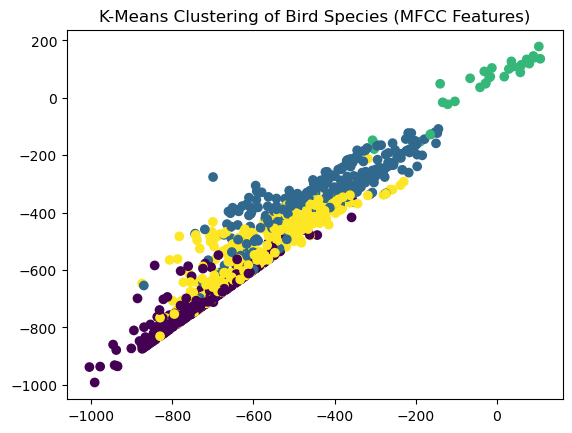

['kmeans_model.pkl']

In [79]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=len(set(y_encoded)), random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Compare clusters with labels
df["Cluster"] = y_kmeans
df["Actual"] = y_encoded
print(df.groupby(["Cluster", "Actual"]).size())

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis")
plt.title("K-Means Clustering of Bird Species (MFCC Features)")
plt.show()

joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")

## Train Deep Learning Model (Optional)

In [124]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a simple neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0),
    Dense(128, activation='relu'),
    Dropout(0),
    Dense(len(set(y_encoded)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {acc:.4f}")

model.save("bird_nn_model.keras")

Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3142 - loss: 73.3455 - val_accuracy: 0.4933 - val_loss: 10.3532
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 8.9749 - val_accuracy: 0.4619 - val_loss: 9.8237
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5856 - loss: 7.8792 - val_accuracy: 0.4574 - val_loss: 9.2395
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6024 - loss: 6.0246 - val_accuracy: 0.4843 - val_loss: 9.5390
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6298 - loss: 4.3433 - val_accuracy: 0.4843 - val_loss: 7.7386
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6166 - loss: 4.6200 - val_accuracy: 0.4529 - val_loss: 8.2613
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 3.4382 - val_accuracy: 0.4529 - val_loss: 10.2408
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - loss: 3.4778 - val_accuracy: 0.5919 - val_loss: 5.4065


# Prediction

In [81]:
import os
import librosa
import numpy as np
import pandas as pd
import joblib
# from tensorflow.keras.models import load_model

# Load trained models
rf_model = joblib.load("random_forest_model.pkl")
svm_model = joblib.load("svm_model.pkl")
kmeans_model = joblib.load("kmeans_model.pkl")
# nn_model = load_model("bird_nn_model.h5")  # Load deep learning model
label_encoder = joblib.load("label_encoder.pkl")  # Load label encoder

# Define function to extract MFCC features from test audio files
def extract_mfcc_test(file_path, max_pad_len=50):
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        pad_width = max_pad_len - mfcc.shape[1]
        if pad_width > 0:
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
        return mfcc.flatten()
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, adjusted_rand_score

# Predict with models
rf_preds = rf_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
kmeans_preds = kmeans_model.predict(X_test)
# nn_preds = np.argmax(nn_model.predict(X_test), axis=1)  # Deep Learning predictions

# Accuracy
rf_acc = accuracy_score(y_test, rf_preds)
svm_acc = accuracy_score(y_test, svm_preds)

# ARI
rf_ari = adjusted_rand_score(y_test, rf_preds)
svm_ari = adjusted_rand_score(y_test, svm_preds)
kmeans_ari = adjusted_rand_score(y_test, kmeans_preds)

# Classification reports
rf_report = classification_report(y_test, rf_preds, target_names=label_encoder.classes_)
svm_report = classification_report(y_test, svm_preds, target_names=label_encoder.classes_)

# Decode labels
rf_labels = label_encoder.inverse_transform(rf_preds)
svm_labels = label_encoder.inverse_transform(svm_preds)
# nn_labels = label_encoder.inverse_transform(nn_preds)

# Print results
print("\nModel Evaluation on X_test:")
for i in range(len(X_test)):
    print(f"File: {file}")
    print(f" - Random Forest: {rf_labels[i]}")
    print(f" - SVM: {svm_labels[i]}")
    print(f" - K-Means Cluster: {kmeans_preds[i]}")
    # print(f" - Neural Network: {nn_labels[i]}")
    print("-" * 40)

# Print evaluation results
print("\n📊 **Model Evaluation on X_test (from dataset split):**")
print(f"✅ Random Forest Accuracy: {rf_acc:.4f}")
print(f"✅ SVM Accuracy: {svm_acc:.4f}")

print(f"\n✅ RF ARI: {rf_ari:.4f}")
print(f"✅ SVM ARI: {svm_ari:.4f}")
print(f"✅ K-Means ARI: {kmeans_ari:.4f} (Higher is better)")

print("\n🔎 **Random Forest Classification Report:**\n", rf_report)
print("\n🔎 **SVM Classification Report:**\n", svm_report)

# Confusion Matrix
print("\n📌 **Random Forest Confusion Matrix:**")
print(confusion_matrix(y_test, rf_preds))

print("\n📌 **SVM Confusion Matrix:**")
print(confusion_matrix(y_test, svm_preds))


Model Evaluation on X_test:
File: 798060.wav
 - Random Forest: Larus_canus
 - SVM: Anas_platyrhynchos
 - K-Means Cluster: 0
----------------------------------------
File: 798060.wav
 - Random Forest: Anas_platyrhynchos
 - SVM: Anas_platyrhynchos
 - K-Means Cluster: 1
----------------------------------------
File: 798060.wav
 - Random Forest: Larus_canus
 - SVM: Larus_canus
 - K-Means Cluster: 1
----------------------------------------
File: 798060.wav
 - Random Forest: Anas_platyrhynchos
 - SVM: Larus_canus
 - K-Means Cluster: 1
----------------------------------------
File: 798060.wav
 - Random Forest: Passer_montanus
 - SVM: Passer_montanus
 - K-Means Cluster: 1
----------------------------------------
File: 798060.wav
 - Random Forest: Anas_platyrhynchos
 - SVM: Larus_canus
 - K-Means Cluster: 0
----------------------------------------
File: 798060.wav
 - Random Forest: Larus_canus
 - SVM: Larus_canus
 - K-Means Cluster: 3
----------------------------------------
File: 798060.wav
 